# Analyzing borrowers’ risk of defaulting

My project is to prepare a report for a bank’s loan division. I will find out if a customer’s marital status and number of children has an impact on whether they will default on a loan. The bank already has some data on customers’ credit worthiness.

My main steps of analysis will be filling the missing values and necessary information. I will presenting the impact of number of children, martial status and income on whether cosumers pay the loan on time or not.

## Open the data file and have a look at the general information. 

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pymystem3 import Mystem

In [5]:
data = pd.read_csv('credit_scoring_eng.csv')
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


### Conclusion

At first look we can notice there is a lot of information in the table and many columns. Im choosing to focus on children, family status, income type, total income and purpose because they are the relevant columns for the analysis

## Data preprocessing

### Processing missing values

In [2]:
data.info() #checking basic info about the table. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [7]:
data.isnull().sum()*100/len(data) #checking how many null % is in every column

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

In [4]:
for i in data:
     print( i, len(data[data[i]==0])) #cheking if there is '0' in the column and decide if it make sense

children 14149
days_employed 0
dob_years 101
education 0
education_id 5260
family_status 0
family_status_id 12380
gender 0
income_type 0
debt 19784
total_income 0
purpose 0


In [5]:
data.days_employed #it doesn't make sense that some in minus work days

0         -8437.673028
1         -4024.803754
2         -5623.422610
3         -4124.747207
4        340266.072047
             ...      
21520     -4529.316663
21521    343937.404131
21522     -2113.346888
21523     -3112.481705
21524     -1984.507589
Name: days_employed, Length: 21525, dtype: float64

In [6]:
data.days_employed/365 
#some of them worked for 942 years. I'll will report this column to the managment and ignore it for now due to the fact it is unrelavent to task

0        -23.116912
1        -11.026860
2        -15.406637
3        -11.300677
4        932.235814
            ...    
21520    -12.409087
21521    942.294258
21522     -5.789991
21523     -8.527347
21524     -5.437007
Name: days_employed, Length: 21525, dtype: float64

In [7]:
data.children.value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [8]:
data.children.describe()

count    21525.000000
mean         0.538908
std          1.381587
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         20.000000
Name: children, dtype: float64

In [9]:
data.loc[data['children']==20, 'children'] = 2
data.children.value_counts()
# 20 children is unlikely so I decided to treat it as a typo and change it to 2 children

 0    14149
 1     4818
 2     2131
 3      330
-1       47
 4       41
 5        9
Name: children, dtype: int64

In [10]:
data.loc[data['children']== -1, 'children'] = 1
data.children.value_counts()
# same here. -1 is a typo and I change it to 1

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [11]:
data.children.value_counts()

0    14149
1     4865
2     2131
3      330
4       41
5        9
Name: children, dtype: int64

In [12]:
data.children.describe()

count    21525.000000
mean         0.479721
std          0.755528
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: children, dtype: float64

In [13]:
data.total_income.isnull().sum()

2174

In [14]:
data.total_income.describe()

count     19351.000000
mean      26787.568355
std       16475.450632
min        3306.762000
25%       16488.504500
50%       23202.870000
75%       32549.611000
max      362496.645000
Name: total_income, dtype: float64

In [15]:
group= data.groupby('income_type')['total_income'].median()
group

income_type
business                       27577.2720
civil servant                  24071.6695
employee                       22815.1035
entrepreneur                   79866.1030
paternity / maternity leave     8612.6610
retiree                        18962.3180
student                        15712.2600
unemployed                     21014.3605
Name: total_income, dtype: float64

In [10]:
data['new_income']= data['total_income'].fillna(data.groupby('income_type')['total_income'].transform('median'))
#I decided to change to missing values in total income by creating a new column which instead fills the 'na' with median income compatible to the income type

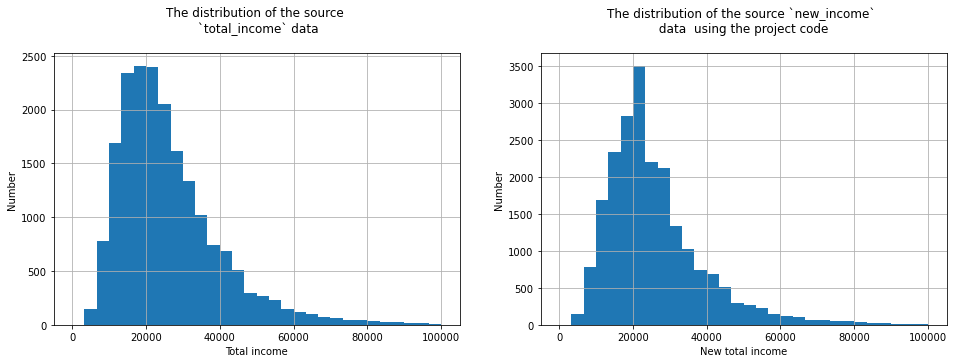

In [11]:

# set the plot setting (two plots and overall size):
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

plot_range = (0, 100000)

# first plot: the histogram:
axs[0].hist(x = data['total_income'], range = plot_range, bins = 30)
axs[0].grid()
# the title:
axs[0].set_title('The distribution of the source \n `total_income` data\n ')
# axis labels:
axs[0].set_xlabel('Total income')
axs[0].set_ylabel('Number')

# first plot: the histogram:
axs[1].hist(x = data['new_income'], range = plot_range, bins = 30)
axs[1].grid()
# the title:
axs[1].set_title('The distribution of the source `new_income` \n data  using the project code \n ')
# axis labelsa
axs[1].set_xlabel('New total income')
axs[1].set_ylabel('Number')

plt.show()

In [18]:
data[data.total_income.isnull()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_income
12,0,NaN,65,secondary education,1,civil partnership,1,M,retiree,0,NaN,to have a wedding,18962.3180
26,0,NaN,41,secondary education,1,married,0,M,civil servant,0,NaN,education,24071.6695
29,0,NaN,63,secondary education,1,unmarried,4,F,retiree,0,NaN,building a real estate,18962.3180
41,0,NaN,50,secondary education,1,married,0,F,civil servant,0,NaN,second-hand car purchase,24071.6695
55,0,NaN,54,secondary education,1,civil partnership,1,F,retiree,1,NaN,to have a wedding,18962.3180
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Secondary Education,1,married,0,M,business,0,NaN,purchase of a car,27577.2720
21495,1,NaN,50,secondary education,1,civil partnership,1,F,employee,0,NaN,wedding ceremony,22815.1035
21497,0,NaN,48,BACHELOR'S DEGREE,0,married,0,F,business,0,NaN,building a property,27577.2720
21502,1,NaN,42,secondary education,1,married,0,F,employee,0,NaN,building a real estate,22815.1035


In [19]:
data.loc[data['dob_years']== 0]
#I decided to change the D.O.B from 0 to undef because I can't determine the right answer.

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_income
99,0,346541.618895,0,Secondary Education,1,married,0,F,retiree,0,11406.644,car,11406.6440
149,0,-2664.273168,0,secondary education,1,divorced,3,F,employee,0,11228.230,housing transactions,11228.2300
270,3,-1872.663186,0,secondary education,1,married,0,F,employee,0,16346.633,housing renovation,16346.6330
578,0,397856.565013,0,secondary education,1,married,0,F,retiree,0,15619.310,construction of own property,15619.3100
1040,0,-1158.029561,0,bachelor's degree,0,divorced,3,F,business,0,48639.062,to own a car,48639.0620
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19829,0,NaN,0,secondary education,1,married,0,F,employee,0,NaN,housing,22815.1035
20462,0,338734.868540,0,secondary education,1,married,0,F,retiree,0,41471.027,purchase of my own house,41471.0270
20577,0,331741.271455,0,secondary education,1,unmarried,4,F,retiree,0,20766.202,property,20766.2020
21179,2,-108.967042,0,bachelor's degree,0,married,0,M,business,0,38512.321,building a real estate,38512.3210


In [20]:
data.loc[(data.dob_years == 0),'dob_years']='undef'

In [21]:
data.dob_years.value_counts()

35       617
40       609
41       607
34       603
38       598
42       597
33       581
39       573
31       560
36       555
44       547
29       545
30       540
48       538
37       537
50       514
43       513
32       510
49       508
28       503
45       497
27       493
56       487
52       484
47       480
54       479
46       475
58       461
57       460
53       459
51       448
59       444
55       443
26       408
60       377
25       357
61       355
62       352
63       269
64       265
24       264
23       254
65       194
66       183
22       183
67       167
21       111
undef    101
68        99
69        85
70        65
71        58
20        51
72        33
19        14
73         8
74         6
75         1
Name: dob_years, dtype: int64

conclusion

I searched for missing values or values equal to '0' in order to decide if I will drop them, fill them or ignore them:
#Filling the missing:
1. total income is importent for my research so I filled the missing values with the median income compatible to the median income type
2. children column had two values that didn't make sense so I guessed that they were typo and changed them. I also checked to see if the average changed before and after and it didn't affect much
3. I decided to change in dob_years column the '0' to undef, becaus obvisouly people asking for loan can't be 0 years old. I can't determine the real age 
#Ignore the missing:
1. I decided to ignore the column 'days employed' because the values are wrong. some employees worked for 900 years. Also some values were in minus. The column is not relevant for my analysis so I decided to leave it as it is and ask for a new dataset

### Data type replacement

In [22]:
data['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

In [12]:
data['education_lower']= data['education'].str.lower()
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_income,education_lower
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40620.102,bachelor's degree
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,17932.802,secondary education
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,23341.752,secondary education
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,42820.568,secondary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,25378.572,secondary education


In [24]:
data['new_income']= data['new_income'].astype('int')
data['new_income']

0        40620
1        17932
2        23341
3        42820
4        25378
         ...  
21520    35966
21521    24959
21522    14347
21523    39054
21524    13127
Name: new_income, Length: 21525, dtype: int64

### Processing duplicates

In [25]:
data.duplicated().sum()

54

In [26]:
data.loc[data.duplicated(), :]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_income,education_lower
2849,0,NaN,41,secondary education,1,married,0,F,employee,0,NaN,purchase of the house for my family,22815,secondary education
4182,1,NaN,34,BACHELOR'S DEGREE,0,civil partnership,1,F,employee,0,NaN,wedding ceremony,22815,bachelor's degree
4851,0,NaN,60,secondary education,1,civil partnership,1,F,retiree,0,NaN,wedding ceremony,18962,secondary education
5557,0,NaN,58,secondary education,1,civil partnership,1,F,retiree,0,NaN,to have a wedding,18962,secondary education
7808,0,NaN,57,secondary education,1,civil partnership,1,F,retiree,0,NaN,having a wedding,18962,secondary education
8583,0,NaN,58,bachelor's degree,0,unmarried,4,F,retiree,0,NaN,supplementary education,18962,bachelor's degree
9238,2,NaN,34,secondary education,1,married,0,F,employee,0,NaN,buying property for renting out,22815,secondary education
9528,0,NaN,66,secondary education,1,widow / widower,2,F,retiree,0,NaN,transactions with my real estate,18962,secondary education
9627,0,NaN,56,secondary education,1,married,0,F,retiree,0,NaN,transactions with my real estate,18962,secondary education
10462,0,NaN,62,secondary education,1,married,0,F,retiree,0,NaN,buy commercial real estate,18962,secondary education


### Conclusion

As for duplicated rows I decided not to drop them because they are insignifant compare to the overall rows (21525). Another reason is that I believe real people filled the detail and most chances that these is real data and not duplicate

### Categorizing Data

In [27]:
data.new_income.describe()

count     21525.000000
mean      26435.582625
std       15686.982483
min        3306.000000
25%       17247.000000
50%       22815.000000
75%       31287.000000
max      362496.000000
Name: new_income, dtype: float64

In [28]:
def income_group(new_income):
    if new_income <= 17247:
        return 'low income'
    if ((new_income >=17248)&(new_income <= 31286)):
        return 'average income'
    if new_income >=31288:
        return 'high income'
#creating category for income

In [29]:
data['income_group'] = data['new_income'].apply(income_group)
data


,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,new_income,education_lower,income_group
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,40620,bachelor's degree,high income
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,17932,secondary education,average income
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house,23341,secondary education,average income
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,42820,secondary education,high income
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,25378,secondary education,average income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,35966,secondary education,high income
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,24959,secondary education,average income
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,14347,secondary education,low income
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,39054,secondary education,high income


In [30]:
data.income_group.value_counts()

average income    10761
low income         5382
high income        5381
Name: income_group, dtype: int64

In [31]:
data.purpose.unique()

array(['purchase of the house', 'car purchase', 'supplementary education',
       'to have a wedding', 'housing transactions', 'education',
       'having a wedding', 'purchase of the house for my family',
       'buy real estate', 'buy commercial real estate',
       'buy residential real estate', 'construction of own property',
       'property', 'building a property', 'buying a second-hand car',
       'buying my own car', 'transactions with commercial real estate',
       'building a real estate', 'housing',
       'transactions with my real estate', 'cars', 'to become educated',
       'second-hand car purchase', 'getting an education', 'car',
       'wedding ceremony', 'to get a supplementary education',
       'purchase of my own house', 'real estate transactions',
       'getting higher education', 'to own a car', 'purchase of a car',
       'profile education', 'university education',
       'buying property for renting out', 'to buy a car',
       'housing renovation', 'going

In [32]:
wedding_category=['wedding', 'ceremony']
car_category=['car', 'second-hand', 'cars']
education_category=['education', 'university', 'educated']
house_category=['house', 'real', 'estate', 'property', 'transactions', 'housing']

In [34]:
m=Mystem()

In [35]:
m.lemmatize('university education')

['university', ' ', 'education', '\n']

In [36]:
def lemma_function(line):
    lemmatized=m.lemmatize(line)
    return lemmatized

In [37]:
example= data.loc[2]['purpose']
example

'purchase of the house'

In [38]:
lemma_function(example)

['purchase', ' ', 'of', ' ', 'the', ' ', 'house', '\n']

In [39]:
any(word in lemma_function(example) for word in house_category)

True

In [40]:
def lemma_function(line):
    lemmatized=m.lemmatize(line)
    lemmatized=[word.lower() for word in lemmatized]
    if any(word in lemmatized for word in house_category):
        return 'house'
    elif any(word in lemmatized for word in education_category):
        return 'education'
    elif any(word in lemmatized for word in car_category):
        return 'car'
    elif any(word in lemmatized for word in wedding_category):
        return 'wedding'
    else:
        return 'other'
  

In [41]:
data['clean_purpose']= data['purpose'].apply(lemma_function)

In [42]:
data['clean_purpose'].value_counts()

house        10840
car           4315
education     4022
wedding       2348
Name: clean_purpose, dtype: int64

### Conclusion

I decided to categorized the total_income column and the purpose column
Total income- I categorized to three levels of income. Due to the fact I don't know the bank's country nor the year it took place, I can't rely on statistical income rates. I decided to rely on the describe() method of the table (25%, 50%, 75%)
about 50% of the people have an average income
Clean purpose- I categorized the column to four categories according to key words. I seems that about 50% of the people asking loan for buying a new house/real estate.

## Answer these questions

- Is there a relation between having kids and repaying a loan on time?

In [15]:
family_children= data.pivot_table(index='children',columns='debt',values='gender',aggfunc='count',margins=True)
family_children

debt,0,1,All
children,,,
-1,46.0,1.0,47
0,13086.0,1063.0,14149
1,4374.0,444.0,4818
2,1861.0,194.0,2055
3,303.0,27.0,330
4,37.0,4.0,41
5,9.0,NaN,9
20,68.0,8.0,76
All,19784.0,1741.0,21525


In [44]:
family_children= family_children.fillna(0)

In [45]:
family_children['default_rate']= (family_children[1]/family_children['All']*100)
family_children

debt,0,1,All,default_rate
children,,,,
0,13086.0,1063.0,14149,7.512898
1,4420.0,445.0,4865,9.146968
2,1929.0,202.0,2131,9.479118
3,303.0,27.0,330,8.181818
4,37.0,4.0,41,9.756098
5,9.0,0.0,9,0.000000
All,19784.0,1741.0,21525,8.088269


### Conclusion

According to the results and comparise to the overall default rate, we can conclude: 
1. Families without any children are below the average default rate which means they are most likely to pay the loan on time
2. Families with children are most likely falls behind paying on time but, We can't conclude there is correlation between the number of children and higher rate in debt.
3. The row with 5 children isn't representative because only 9 families has  

- Is there a relation between marital status and repaying a loan on time?

In [46]:
family_status= data.pivot_table(index='family_status',columns='debt',values='family_status_id',aggfunc='count', margins=True).reset_index()
family_status

debt,family_status,0,1,All
0,civil partnership,3789,388,4177
1,divorced,1110,85,1195
2,married,11449,931,12380
3,unmarried,2539,274,2813
4,widow / widower,897,63,960
5,All,19784,1741,21525


In [47]:
family_status['default_rate']= (family_status[1]/ family_status['All'])*100
family_status

debt,family_status,0,1,All,default_rate
0,civil partnership,3789,388,4177,9.288963
1,divorced,1110,85,1195,7.112971
2,married,11449,931,12380,7.520194
3,unmarried,2539,274,2813,9.740491
4,widow / widower,897,63,960,6.562500
5,All,19784,1741,21525,8.088269


In [48]:
family_debt_grouped= data.groupby('family_status').debt.agg(['sum','count'])
family_debt_grouped['default_ratio']= (family_debt_grouped['sum']/family_debt_grouped['count'])*100
family_debt_grouped

,sum,count,default_ratio
family_status,,,
civil partnership,388,4177,9.288963
divorced,85,1195,7.112971
married,931,12380,7.520194
unmarried,274,2813,9.740491
widow / widower,63,960,6.562500


In [49]:
family_debt_grouped['all']= ((family_debt_grouped['sum'].sum())/(family_debt_grouped['count']).sum())*100
family_debt_grouped

,sum,count,default_ratio,all
family_status,,,,
civil partnership,388,4177,9.288963,8.088269
divorced,85,1195,7.112971,8.088269
married,931,12380,7.520194,8.088269
unmarried,274,2813,9.740491,8.088269
widow / widower,63,960,6.562500,8.088269


### Conclusion

According to the table we can conclude that:
1. civil partnership and unmarried are the groupes that are most likely won't pay the loan on time. 
2. married people on the othe hand will not fall behind. Same for divorced couples
3. widow/widower is the group that will have the most credit for paying on time. Maybe because usually widows are senoirs that are more calculatives when it comes for handling money

- Is there a relation between income level and repaying a loan on time?

In [50]:
income_level_loan_ratio= data.pivot_table(index='income_group',columns='debt',values='family_status_id',aggfunc='count', margins=True).reset_index()
income_level_loan_ratio


debt,income_group,0,1,All
0,average income,9833,928,10761
1,high income,4995,386,5381
2,low income,4955,427,5382
3,All,19783,1741,21524


In [51]:
income_level_loan_ratio['default_rate'] = (income_level_loan_ratio[1]/ income_level_loan_ratio['All'])*100
income_level_loan_ratio

debt,income_group,0,1,All,default_rate
0,average income,9833,928,10761,8.623734
1,high income,4995,386,5381,7.173388
2,low income,4955,427,5382,7.933854
3,All,19783,1741,21524,8.088645


### Conclusion

According to the table we can conclude that:
1. Costumers with average income is the group that have 8.6% chance for not paying on time when the overall income rate is 8%
2. low income is more creditable than average income, maybe because they are aware of their finnacial status and they are more carefuls 
3. As we assumed high income is the group with most chances of paying the loan on time

- How do different loan purposes affect on-time repayment of the loan?

In [52]:
loan_purpose_debt= data.pivot_table(index='clean_purpose',columns='debt',values='family_status_id',aggfunc='count', margins=True).reset_index()


In [53]:
loan_purpose_debt['default_rate']= (loan_purpose_debt[1]/loan_purpose_debt['All'])*100
loan_purpose_debt

debt,clean_purpose,0,1,All,default_rate
0,car,3912,403,4315,9.339513
1,education,3652,370,4022,9.199403
2,house,10058,782,10840,7.214022
3,wedding,2162,186,2348,7.921635
4,All,19784,1741,21525,8.088269


### Conclusion

According to the table we can conclude that:
1. Loans for car and education categories are the most riskiests. Above 9% wont pay on time
2. Loans for house and wedding categories are less riskiests. They are below the overall default rate.
3. We can assume that wedding is an investment that will payoff after the married couple will 
   diposit the money they will get from the guests.
4. Usually, people who are asking for loans such as morgage are economical responsibles and more finnancial stables than youngsters asking loan for high education  

## General conclusion

Accordint to the dataset my results are:
1. coustumers that are more risky than other are:
A. Having children
B. with an average income 
c. Asking a loan for Buying a new car and funding university tuition
2. The data set needs to rewrite in the days employed column
3. For deepen our research I advise to analyse the realations between costumers age and loan repayment. 